<a href="https://colab.research.google.com/github/IqbalLx/Data-Bangalore-Image-Processing/blob/main/computer_vision_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
print(tf.__version__)

2.8.0


## Utils

In [4]:
def visualize_metrics(hist):
  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(hist.epoch, hist.history['loss'], label='Loss')
  plt.plot(hist.epoch, hist.history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(hist.epoch, hist.history['accuracy'], label='Acc')
  plt.plot(hist.epoch, hist.history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [30]:
def visualize_learning_rate(hist):
  plt.figure(figsize=(12, 5))

  plt.plot(hist.epoch, hist.history['lr'], label='Learning Rate')
  plt.legend()

  return plt.show()

# What is Neural Network?

In general, neural network trying to mimic human brain behaviour, which is able to learn. let's see how the learning works

In [80]:
def simple_func(x):
  noise = np.random.normal(0,1,1)[0]
  return 2 * x - 1 + noise

In [81]:
X = np.random.randint(low=1, high=10, size=1000)
y = np.array([simple_func(x) for x in X], dtype="float32")

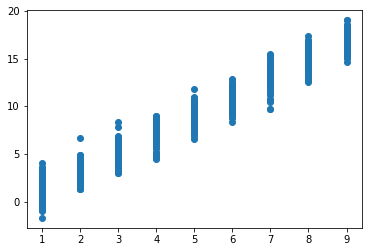

In [82]:
plt.scatter(X, y)
plt.show()

In [99]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer="sgd", loss='mean_squared_error')

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.layers[0].weights

[<tf.Variable 'dense_14/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.54446423]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [101]:
# initial guessing
model.predict([10.0])

array([[-5.444642]], dtype=float32)

In [102]:
model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6353
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1893
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1282
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0884
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0588
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0271
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0081
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9963
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9882
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9622
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9756
Epoch 13/100
32/32 [=================

In [103]:
model.predict([10.0])

array([[18.875494]], dtype=float32)

In [104]:
model.layers[0].weights

[<tf.Variable 'dense_14/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9754308]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([-0.8788151], dtype=float32)>]

# Intro Computer Vision

In [105]:
mnist = tf.keras.datasets.mnist

learn more at: https://tensorflow.org/datasets

In [106]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [124]:
training_images.shape

(60000, 28, 28)

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

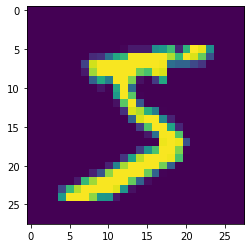

In [107]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [108]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [119]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [125]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0511 - val_accuracy: 0.9854


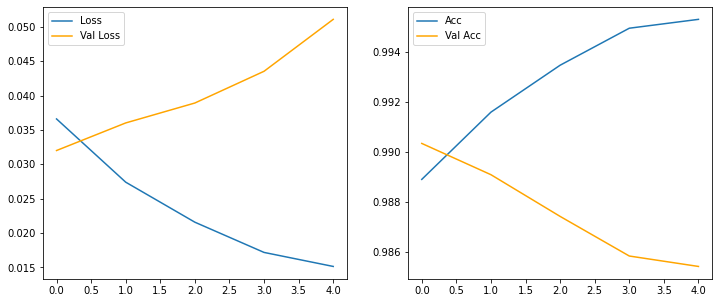

In [128]:
visualize_metrics(hist)

7


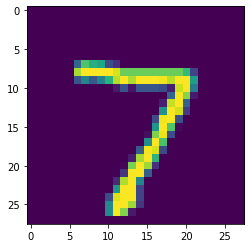

In [132]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [134]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

[[4.2680707e-12 1.5815278e-11 4.0977959e-09 4.7244331e-08 2.1156610e-14
  1.4668753e-12 1.3365578e-20 1.0000000e+00 1.7880232e-10 6.6727774e-09]]


In [141]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 7 with confidency 100.00%


## Let's upgrade our data a little bit more complex

In [5]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(training_images.shape)

(60000, 28, 28)


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

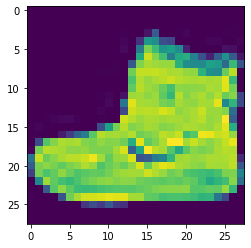

In [143]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

quoting from original homepage, [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [151]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dense_30 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [146]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5230 - accuracy: 0.8183 - val_loss: 0.4207 - val_accuracy: 0.8510
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3896 - accuracy: 0.8597 - val_loss: 0.3783 - val_accuracy: 0.8648
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3518 - accuracy: 0.8704 - val_loss: 0.3694 - val_accuracy: 0.8622
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3233 - accuracy: 0.8818 - val_loss: 0.3771 - val_accuracy: 0.8654
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8881 - val_loss: 0.3551 - val_accuracy: 0.8745


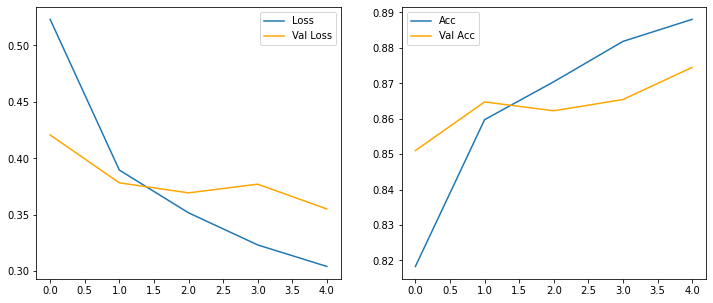

In [147]:
visualize_metrics(hist)

9


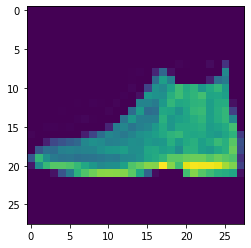

In [20]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [149]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

[[2.3354396e-06 5.1041753e-09 1.2806640e-06 2.2977654e-08 3.2114499e-06
  3.7946105e-03 1.5835934e-05 1.6256758e-03 1.6578231e-05 9.9454039e-01]]


In [150]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 99.45%


In [152]:
hist2 = model.fit(training_images, training_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5191 - accuracy: 0.8193 - val_loss: 0.4017 - val_accuracy: 0.8568
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3837 - accuracy: 0.8619 - val_loss: 0.3885 - val_accuracy: 0.8613
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3422 - accuracy: 0.8751 - val_loss: 0.3710 - val_accuracy: 0.8681
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3180 - accuracy: 0.8829 - val_loss: 0.3336 - val_accuracy: 0.8825
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2970 - accuracy: 0.8920 - val_loss: 0.3222 - val_accuracy: 0.8840
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2851 - accuracy: 0.8953 - val_loss: 0.3252 - val_accuracy: 0.8834
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2734 - accuracy: 0.8977 - val_loss: 0.3222 - val_ac

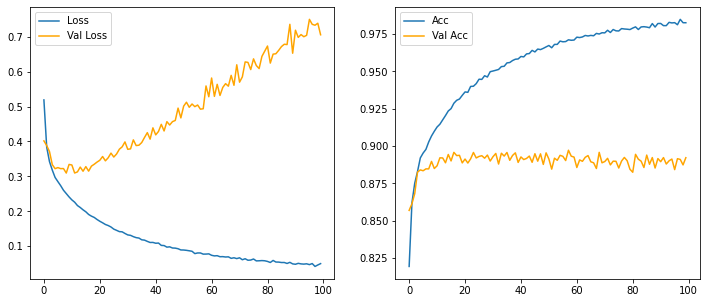

In [153]:
visualize_metrics(hist2)

This is the perfect example of overfitting. Our model become so good in predicting training data, but worse when predicting data that it's never seen before

## Improvising Computer Vision with CNN

In [5]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [157]:
hist = cnn_model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 21s 9ms/step - loss: 0.4682 - accuracy: 0.8286 - val_loss: 0.3457 - val_accuracy: 0.8748
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3106 - accuracy: 0.8847 - val_loss: 0.2959 - val_accuracy: 0.8929
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2636 - accuracy: 0.9025 - val_loss: 0.2716 - val_accuracy: 0.8997
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2290 - accuracy: 0.9154 - val_loss: 0.2556 - val_accuracy: 0.9056
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1996 - accuracy: 0.9254 - val_loss: 0.2704 - val_accuracy: 0.9070


it's even reach accuracy on 90% just after 4 epochs

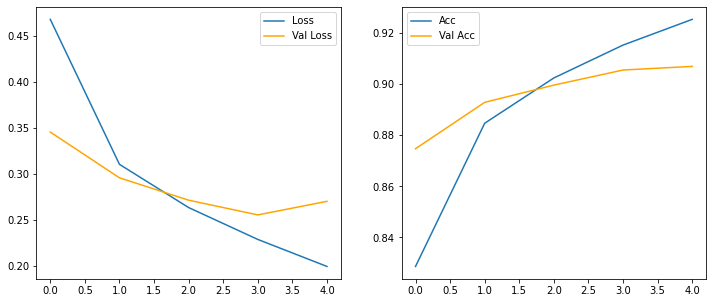

In [158]:
visualize_metrics(hist)

In [6]:
hist2 = cnn_model.fit(training_images, training_labels, batch_size=64, validation_split=0.2, epochs=100)

Epoch 1/100
750/750 [==============================] - 9s 10ms/step - loss: 0.7746 - accuracy: 0.8091 - val_loss: 0.3800 - val_accuracy: 0.8621
Epoch 2/100
750/750 [==============================] - 7s 10ms/step - loss: 0.3446 - accuracy: 0.8741 - val_loss: 0.3238 - val_accuracy: 0.8836
Epoch 3/100
750/750 [==============================] - 7s 10ms/step - loss: 0.2933 - accuracy: 0.8912 - val_loss: 0.3292 - val_accuracy: 0.8827
Epoch 4/100
750/750 [==============================] - 7s 9ms/step - loss: 0.2658 - accuracy: 0.8998 - val_loss: 0.2924 - val_accuracy: 0.8927
Epoch 5/100
750/750 [==============================] - 7s 10ms/step - loss: 0.2446 - accuracy: 0.9064 - val_loss: 0.3190 - val_accuracy: 0.8867
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.2295 - accuracy: 0.9138 - val_loss: 0.3135 - val_accuracy: 0.8886
Epoch 7/100
750/750 [==============================] - 7s 9ms/step - loss: 0.2155 - accuracy: 0.9194 - val_loss: 0.3014 - val_accuracy: 0

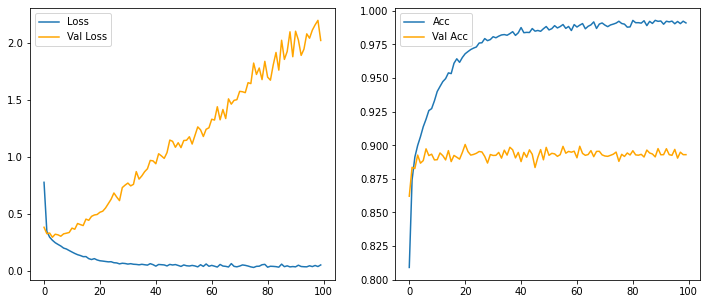

In [7]:
visualize_metrics(hist2)

At some epoch val_accuracy did reach 90% but over all it's still suffer from overfitting, let's see what we can do

## Defining Callbacks

In [7]:
# early stop custom callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [12]:
cnn_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 11, 11, 64)      

In [9]:
hist4 = cnn_model_2.fit(
    training_images, 
    training_labels, 
    batch_size=64, 
    validation_split=0.2, 
    epochs=100,
    callbacks=[myCallback()]
)

Epoch 1/100
750/750 [==============================] - 12s 14ms/step - loss: 0.6003 - accuracy: 0.7876 - val_loss: 0.4166 - val_accuracy: 0.8515
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.4190 - accuracy: 0.8474 - val_loss: 0.4075 - val_accuracy: 0.8496
Epoch 3/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3732 - accuracy: 0.8638 - val_loss: 0.3436 - val_accuracy: 0.8738
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3434 - accuracy: 0.8738 - val_loss: 0.3297 - val_accuracy: 0.8799
Epoch 5/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3260 - accuracy: 0.8811 - val_loss: 0.3151 - val_accuracy: 0.8837
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3119 - accuracy: 0.8847 - val_loss: 0.3020 - val_accuracy: 0.8882
Epoch 7/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3012 - accuracy: 0.8891 - val_loss: 0.3309 - val_accu

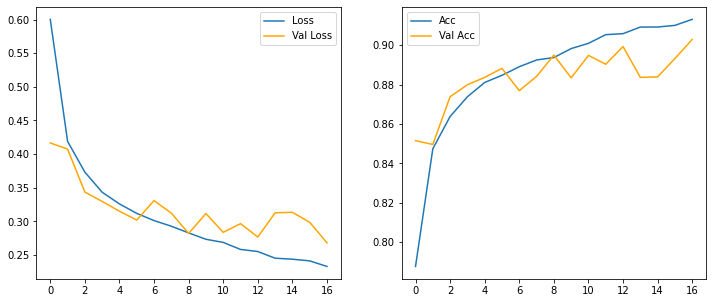

In [10]:
visualize_metrics(hist4)

## More Callbacks

In [16]:
cnn_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_3.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 11, 11, 64)      

In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=10, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [18]:
hist5 = cnn_model_3.fit(
    training_images, 
    training_labels, 
    batch_size=64, 
    validation_split=0.2, 
    epochs=100,
    callbacks=[early_stop, reduce_lr_on_plateau]
)

Epoch 1/100
750/750 [==============================] - 11s 13ms/step - loss: 0.5676 - accuracy: 0.7964 - val_loss: 0.4477 - val_accuracy: 0.8401 - lr: 0.0100
Epoch 2/100
750/750 [==============================] - 9s 12ms/step - loss: 0.4218 - accuracy: 0.8455 - val_loss: 0.5576 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 3/100
750/750 [==============================] - 9s 13ms/step - loss: 0.3842 - accuracy: 0.8591 - val_loss: 0.4247 - val_accuracy: 0.8453 - lr: 0.0100
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3634 - accuracy: 0.8659 - val_loss: 0.3898 - val_accuracy: 0.8565 - lr: 0.0100
Epoch 5/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3468 - accuracy: 0.8727 - val_loss: 0.3772 - val_accuracy: 0.8636 - lr: 0.0100
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3405 - accuracy: 0.8751 - val_loss: 0.3314 - val_accuracy: 0.8767 - lr: 0.0100
Epoch 7/100
750/750 [==============================] -

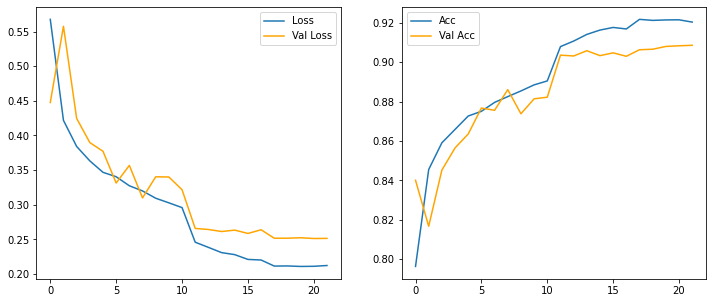

In [24]:
visualize_metrics(hist5)

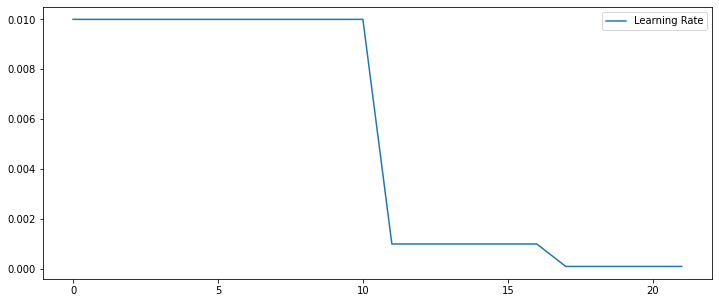

In [32]:
visualize_learning_rate(hist5)

In [22]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = cnn_model_3.predict(prepro_test_image)

print(out)

[[6.4331594e-08 3.8567070e-08 1.9119717e-07 9.9317873e-08 2.9737421e-08
  7.0859437e-06 1.4551675e-07 1.8613066e-03 1.7729548e-06 9.9812931e-01]]


In [23]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 99.81%


# Move on to Real World Data

Unfortunately real world images out there not simply consist of 28x28 grayscale images. Current commonly used resolution is 1280x720 at least, and can be up to 8K. How can we fit those images into our networks?

1. the images os not squared
2. the images are now RGB
3. the size of our images may not fitted or RAM